<h1>KNN Classifier of Pima Indians Diabetes Dataset</h1>


## Importing Important Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

## Reading the Dataset

In [3]:
dataset = pd.read_csv("diabetes.csv")

In [4]:
dataset.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


## ANALYZING THE DATASET

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.shape

(768, 9)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## CHECK FOR MISSING VALUES

In [9]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<p>There are no missing values</p>

## SPLITTING INPUT AND TARGET VARIABLE

In [10]:
X = dataset.drop('Outcome', axis=1).values #Input
y = dataset['Outcome'].values #Target

## TRAIN/TEST SPLIT

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=50,stratify=y)

## IMPLEMENTING THE KNN CLASSIFIER WITH 7 NEIGHBORS

In [12]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
print(knn.score(X_test,y_test))
print(f"Accuracy = {round(knn.score(X_test,y_test),2)*100}" + "%")

0.7186147186147186
Accuracy = 72.0%


# IMPLEMENTING THE KNN CLASSIFIER WITH K NEIGHBORS

In [14]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

In [15]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

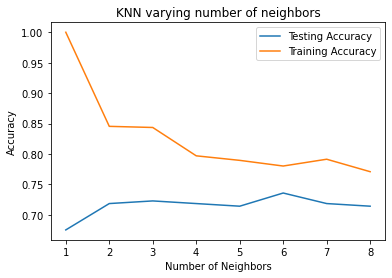

In [16]:
#Generate plot
_ = plt.title('KNN varying number of neighbors')
_ = plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
_ = plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<h1>ANALYZING THE RESULTS</h1>

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
[[133  17]
 [ 49  32]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       150
           1       0.65      0.40      0.49        81

    accuracy                           0.71       231
   macro avg       0.69      0.64      0.65       231
weighted avg       0.70      0.71      0.69       231



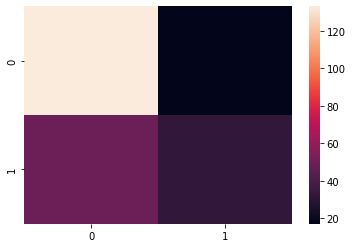

In [17]:
import seaborn as sns
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(data=cm)
print(classification_report(y_test, y_pred))

<p>PLOTTING AN ROC CURVE</p>

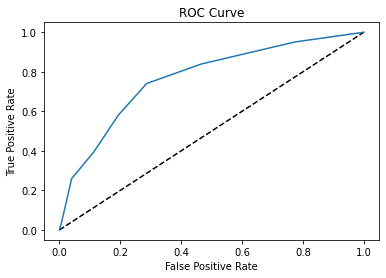

In [18]:
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr , tpr , thresholds = roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()